<a href="https://colab.research.google.com/github/Eldario3080/Git_For_Beginners/blob/main/Git_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Введение**

Git — один из видов систем контроля версий (или СКВ). Такие системы записывают изменения в набор файлов, а позже позволяют вернуться к определенной версии.
Вам может пригодиться СКВ, если вы, например, программист, системный администратор, дизайнер (или в целом работаете с массивом изменяющихся файлов) и хотите сохранить каждую версию проекта. Вы сможете вернуться к любому из сохраненных состояний, просмотреть изменения и увидеть их авторов. Так гораздо проще исправлять возникающие проблемы.

В целом СКВ можно разделить таким образом:

Локальные — все файлы хранятся только в вашей операционной системе, например, разложены по папкам с версиями.
Централизованные — проект хранится на сервере, а ваша рабочая версия включает только текущий набор файлов.
Распределенные — копии проекта (и вся информация о версиях) располагаются не только на сервере, но и на нескольких клиентских машинах, чтобы обеспечить устойчивость к отказу сервера.
Очевидно, что Git — не единственная система контроля версий, однако по многим параметрам самая удобная и популярная на сегодняшний день. Благодаря распределенной структуре репозитории Git хранятся на всех клиентских компьютерах, что защищает от потерь данных и позволяет полноценно управлять версиями проекта оффлайн.

Главная отличительная черта Git состоит в подходе к обработке данных. Каждый раз при сохранении данных проекта (коммите) система фиксирует состояние файла (делает снимок) и создает ссылку на этот снимок. Последующие изменения отражаются через ссылки на более ранние версии файла. Нет необходимости снова сохранять файл целиком. К тому же, основываясь на контрольных hash-суммах, система снимков обеспечивает целостность всей истории изменений. На практике это означает, что невозможно (либо крайне трудно) полностью удалить данные из рабочего каталога и утратить к ним любой доступ. В большинстве случаев данные можно восстановить из ранней версии проекта.

Таким образом, систему контроля версий в Git проще всего представлять как поток снимков (сохраненных состояний проекта).

# **Принципы работы с Git**

У проектных файлов в Git есть 3 базовых состояния


*   Измененные (modified) — файлы в процессе рабочего редактирования.
*   Индексированные (staged) — та часть измененных файлов, которая уже подготовлена к фиксации после редактирования.
*   Зафиксированные (committed) — файлы, уже сохраненные в локальном репозитории.

У Git есть рабочий каталог, где хранятся метаданные и локальная база рабочего проекта. Именно эта часть копируется, когда вы клонируете проект (репозиторий) с сервера.

Чаще всего работа с Git устроена примерно так:



1.   Вы вносите правки в файлы рабочей копии проекта.
2.   Индексируете их, подготавливая к коммиту (здесь Git создает снимки новых правок).
2.   Делаете коммит, и индексированные правки наконец сохраняются в вашем каталоге Git.

# **Установка Git**

Создать свой проект и начать пользоваться Git в нем достаточно просто. Мы будем рассматривать работу в командной строке терминала, потому что там реализован полный набор команд. Вероятно, в будущем вам будет проще воспользоваться встроенными инструментами в крупном приложении (например, в Visual Studio, если вы программист).

Однако командная строка все равно удобна для тонкой настройки и «нестандартных» действий, поэтому полезно представлять себе, как управлять проектом через нее.

Сначала потребуется установить Git на свой компьютер.

# **Установка в Linux**

Для дистрибутивов, похожих на Fedora, RHEL или CentOS, выполните команду dnf:

In [ ]:
> sudo dnf install git-all

На Ubuntu и других Debian-подобных систем введите apt:

In [ ]:
> sudo apt install git

# **Настройка Git**

Настроить рабочую среду нужно только один раз — после обновлений параметры не сбросятся. Если понадобится, в любое время можно изменить ваши настройки.

Самый удобный способ изменения конфигурации — встроенная утилита git config. Настройки Git имеют три уровня:



1.   Параметры из файла [path]/etc/gitconfig (системные) могут работать для всех пользователей системы и репозиториев. Они редактируются командой git config —system
2.   Параметры из файла ~/.gitconfig или ~/.config/git/config (глобальные) применяются к одному пользователю, если запустить команду git config —global.
3.   Локальные параметры из файла config в рабочем каталоге .git/config сохраняют только для выбранного репозитория. Ему соответствует команда git config —local.

Если запускать git config без параметров, будет использоваться локальный уровень, никакие из более глобальных настроек не изменятся.

Всю используемую конфигурацию можно просмотреть так:



In [ ]:
> git config --list --show-origin

Представимся Git, чтобы в рабочих коммитах сохранялось ваше авторство:

In [ ]:
> git config --global user.name "Danil Z"
> git config --global user.email danilz@danilz.com

Также можно выбрать и текстовый редактор, введя команду git config —global core.editor. Например, чтобы выбрать Emacs, выполните:

In [ ]:
> git config --global core.editor emacs

В Windows нужно указывать полный путь к файлу. К примеру, для установки Notepad++ нужно запустить подобную команду:

In [ ]:
> git config --global core.editor "'C:/Program Files/Notepad++/notepad++.exe' -multiInst -notabbar -nosession -noPlugin"

Стоит отметить, что на практике текстовый редактор в Git может и не пригодиться, особенно если вы активно используете стороннее ПО — например, в Visual Studio все текстовые заметки для Git можно писать в отдельном окне. Текстовые редакторы в командной строке отличаются своеобразным управлением, которое потребует от вас отдельного изучения.

Общий список текущих настроек просматривается с помощью команды git config —list. Проверить, что записано в любой из доступных настроек, можно командой с ключом  git config <key>:

In [ ]:
> git config user.email

# **Выбор ветки по умолчанию**

Итак, наконец можно создать репозиторий в выбранном каталоге командой git init. Основная ветка автоматически будет названа master. Изменить это (в нашем случае задав ветку main) можно так:

In [ ]:
> git config --global init.defaultBranch main

# **Работа в репозитории**

Как правило, есть два варианта начать работу с репозиторием Git:

1.   Можно выбрать локальный каталог и создать новый репозиторий в нем.
2.   Можно клонировать существующий репозиторий с локального компьютера или сервера. Обычно проекты клонируются именно с сервера.

Если у вас на компьютере уже есть рабочий проект, но еще не назначен контроль версий, то нужно сначала перейти в каталог проекта.

Linux:

In [ ]:
> cd /home/user/SomeConsoleApp

Инициализируем репозиторий:

In [ ]:
> git init

Команда создаст каталог с именем .git, в котором будут храниться структурные файлы репозитория.

И, наконец, нужно добавить под контроль версий все существующие файлы командой git add . (точка в конце важна!). Можно добавлять и по одному файлу, с помощью git add <имя файла>.

Заодно создадим начальный коммит командой git commit:

In [ ]:
> git add readme.md
> git commit -m 'Initial project version'

# **Клонирование существующего репозитория**

Когда вы работаете в команде, разрабатываемые проекты часто размещают на сервере. Это один из самых распространенных сценариев. Вам нужно получить копию проекта последней версии на свой компьютер, чтобы далее вносить в него свой вклад.

В качестве примера мы будем рассматривать проект, который создадим на ресурсе github. После регистрации на сайте и подтверждения по e-mail нужно создать новый репозиторий.

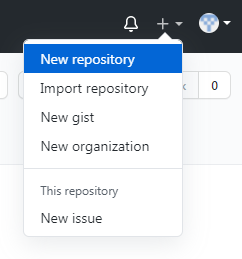

Можно выбрать тип репозитория:

*   Публичный (public) – доступ открыт для любого пользователя, однако права на редактирование выдает владелец проекта;
*   Приватный/скрытый (private) — проект виден только владельцу, другие участники добавляются вручную.

После получения проекта обычно начинается более рутинный рабочий процесс — правки, добавление функционала и т. д. Далее в какой-то момент вы захотите сохранить прогресс в новой версии проекта.

Правила и периодичность обновления могут быть почти любыми, но хорошим тоном обычно считается сохранять рабочую (или промежуточно завершенную) версию. Важное требование для команд разработчиков — возможность сборки проекта, иначе другие участники команды будут вынуждены тратить время на борьбу с ошибками компиляции.

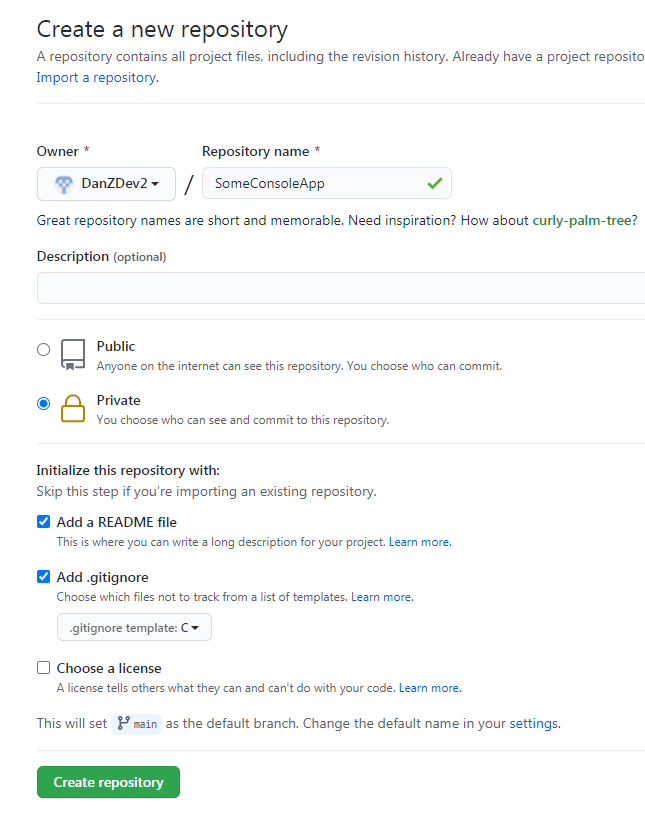

# **Сохранение снимков и просмотр статуса проекта**

Как упоминалось ранее, часть файлов в рабочем каталоге может и не находиться под контролем версий. За отслеживаемыми файлами «наблюдает» Git, они были как минимум в прошлом снимке состояния проекта. Неотслеживаемыми могут быть, например, вспомогательные файлы в рабочем проекте, если они не зафиксированы в прошлой версии проекта и не готовы к коммиту. Их можно выделить в отдельную категорию для Git, о чем будет рассказано далее.

Сразу после клонирования все файлы проекта будут отслеживаемыми. Отредактировав их и привнеся что-то новое, вы индексируете (stage) и фиксируете (commit) правки, и так для каждой версии проекта.

При этом нужно внимательно следить, чтобы вспомогательные файлы, особенно объемные, оставались вне контроля версий. Если по недосмотру добавить их в коммит и отправить на сервер — вероятнее всего, ваши правки придется частично откатывать.

Проверить состояние файлов в рабочем каталоге можно командой git status. После клонирования консоль выведет примерно такую информацию:

In [ ]:
On branch master
Your branch is up to date with ‘origin/master’.

nothing to commit, working tree clean

Теперь отредактируем файлы (в этом примере было консольное демо-приложение, созданное с помощью Visual Studio) и сравним статус:

In [ ]:
>git status
On branch master
Your branch is up to date with ‘origin/master’.
Untracked files:
(use “git add <file>...” to include in what will be committed)
	Program.cs
	SomeConsoleApp.csproj
	SomeConsoleApp.sln
nothing added to commit but untracked files present (use “git add” to track)

Теперь зафиксируем изменения. В коммит войдут только те файлы, которые вы изменили и добавили командой git add. Остальные будут лишь дополнительными файлами в каталоге проекта.

Стандартный способ — команда git commit, которую мы уже видели раньше. Без дополнительных аргументов она откроет встроенный текстовый редактор, поэтому для простоты рекомендуется добавить аргумент -m и вписать комментарий в кавычках:

In [ ]:
> git commit -m "Task 2: basic project template added"

Для удаления ненужных файлов из репозитория можно использовать команду git rm <file-name>. Файл также пропадет из рабочего каталога. Выполнить коммит необходимо и в этом случае; до тех пор структура проекта не изменится.



# **Файл .gitignore**

Как упоминалось ранее, в рабочий каталог могут попадать файлы, которые вам бы не хотелось отправлять на сервер. Это и документы с вашими экспериментами или образцами, и автоматически генерируемые части проекта, актуальные только на вашем компьютере. Git может полностью игнорировать их, если создать в рабочем каталоге файл с названием .gitignore и внести в него все имена ненужных файлов и папок.

Открывать файл можно в любом текстовом редакторе. Обычно удобнее не перечислять абсолютно все имена (которые к тому же всегда известны), а воспользоваться подобными инструкциями:

In [ ]:
/bin
/obj
*.pdb
*.exe

Если прописать такое содержимое файла .gitignore, то репозиторий git будет полностью игнорировать папки /bin и /obj, а также любые файлы с расширениями .pdb и .exe, хранящиеся в вашем рабочем каталоге.

Рекомендуется создавать .gitignore до первой отправки вашего проекта в удаленный репозиторий, чтобы на сервер не попало никаких лишних файлов и каталогов. Разумеется, важно проверить, чтобы в .gitignore не были упомянуты критичные для проекта файлы, иначе у других участников команды возникнут проблемы после следующего обновления.

# **Управление удаленными репозиториями**

Просмотреть список текущих онлайн-репозиториев можно командой git remote. Добавить другие — с помощью команды git remote add <shortname> <url>, например:

In [ ]:
>git remote add myDemo https://github.com/DanZDev2/DemoApp
>git remote
myDemo
origin

# **Отправка изменений в удаленный репозиторий (Push)**

На вашем компьютере есть проект со внесенными изменениями, но вы хотите поделиться новой версией со всей командой.

Команда для отправки изменений на сервер такова: git push <remote-name> <branch-name>. Если ваша ветка называется master, то команда для отправки коммитов станет такой:

In [ ]:
> git push origin master

Она сработает, если у вас есть права на запись на том сервере, откуда вы клонировали проект. Также предполагается, что другие участники команды за это время не обновляли репозиторий.

Следует к тому же помнить, что в разработке для промежуточных правок часто используется не главная ветка (master), а одна из параллельных (например, Dev). Работая в команде, этому обязательно нужно уделять пристальное внимание.

# **Получение изменений из репозитория (Pull)**

Самый простой и быстрый способ получить изменения с сервера — выполнить команду git pull, которая извлечет (fetch) данные с сервера и попытается встроить/объединить (merge) их с вашей локальной версией проекта.

На этом этапе могут возникать конфликты версий, когда несколько человек поработали над одними и теми же файлами в проекте и сохранили свои изменения. Избежать этого можно, если изолировать части проекта, поручив работу над одной частью только одному человеку. Разумеется, на практике это не всегда выполнимо, поэтому в Git есть инструменты для разрешения конфликтов версий. Они будут рассмотрены далее.

# **Создание веток и переключение между ними**

Создадим две дополнительные ветки Dev и Test (например, одна может пригодиться для процесса разработки, а другая — для запуска в тестирование). Введем команду git branch <branch-name> дважды с разными аргументами:

In [ ]:
>git branch Dev
>git branch Test

Ветки созданы, но мы по-прежнему работаем в master. Для переключения на другую нужно выполнить git checkout <branch-name>:

In [ ]:
>git checkout Dev
Switched to branch ‘Dev’
Your branch is up to date with ‘origin/Dev’.

Внесем некоторые изменения в файл README.md и зафиксируем их, чтобы они отразились в ветке Dev:

In [ ]:
>git add .
>git commit -m “dev readme changed”
[Dev #####] dev readme changed
1 file changed, 2 insertions(+)

Если теперь отправить их на сервер, то можно убедиться в появившемся отличии веток:

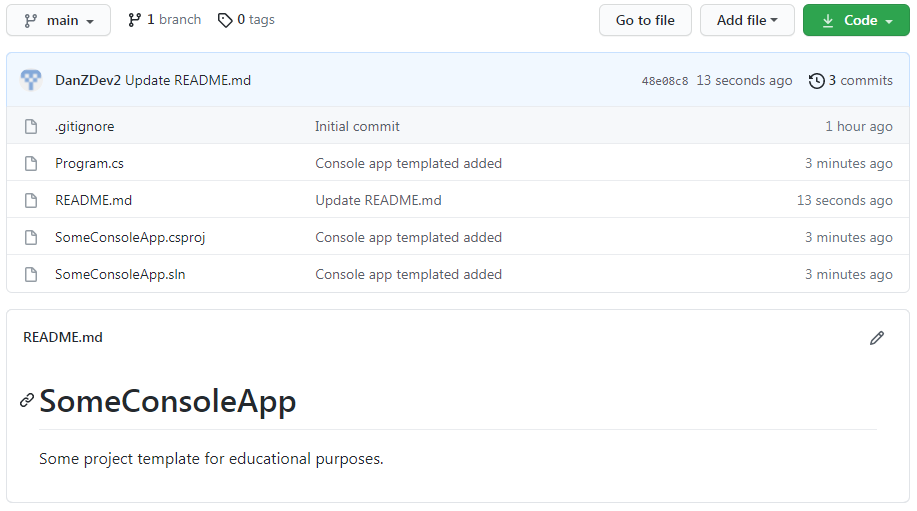

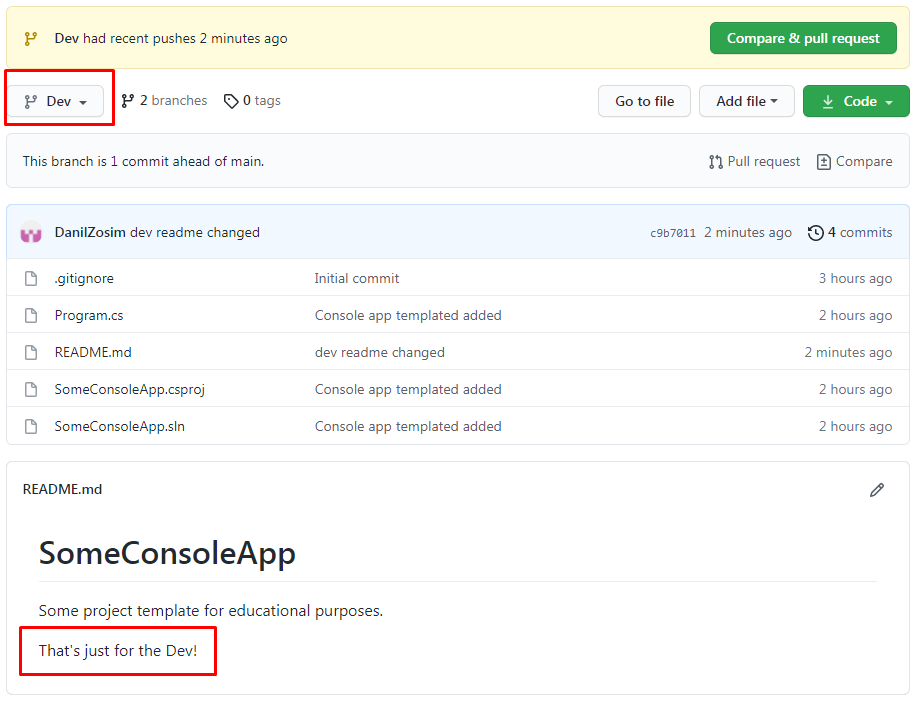

Для переключения обратно на ветку master нужно снова ввести команду git checkout master. Она не изменялась, а значит, после редактирования проекта ветки разойдутся. Это нормальная ситуация для проектов в Git. Важно только понимать, для каких целей используется каждая из веток, и не забывать вовремя переключаться между ними.

# **Слияние веток (merge)**

Работа над проектами часто ведется в несколько этапов, им могут соответствовать ветки (в нашем примере Dev → Test → master). Отдельные ветки могут создаваться для срочного исправления багов, быстрого добавления временных функций, для делегирования части работы другому отделу и т. д. Предположим, что нужно применить изменения из ветки Dev, внеся их в master. Перейдем в master и выполним команду git merge <source-branch>:

In [ ]:
>git merge Dev
Updating #####..#####
Fast-forward
README.md | 2 +-
1 file changed, 1 insertion(+), 1 deletion(-)

Изменения успешно перенесены. В наших упрощенных условиях команда завершилась без ошибок, не найдя конфликтов в файлах. Если же над общими участками какого-либо файла успели поработать несколько человек, с этим нужно разбираться вручную. При возникновении ошибок Git помечает общие части файлов из разных веток и сообщает о конфликте.

Для разрешения конфликтов есть консольная утилита git mergetool. Однако если файл проекта объемный, а общих частей много, пользоваться ей не слишком удобно. Общая рекомендация для таких случаев — пользоваться сторонними инструментами, как и в случае с текстовым редактором для Git.

Когда спорные участки всех файлов приведены к итоговому состоянию, нужно повторить стандартную процедуру: создать коммит и отправить их командой push в нужную ветку в репозитории.

Дальнейшая работа с проектом из репозитория Git, как правило, повторяется по алгоритму:



*   pull (забрать изменения с сервера);
*   внести правки, добавить что-то важное в проекте;
add (добавить изменённые файлы к коммиту);
*   commit (сохранить состояние проекта с комментариями);
*   push (отправить изменения на сервер).
*   merge (при необходимости внедрить изменения из другой ветки проекта).

# **Заключение**

Мы рассмотрели, как устанавливать и настраивать Git в различных ОС, создавать новые и клонировать существующие репозитории, получать и отправлять новые версии проекта, а также ознакомились с базовыми концепциями ведения веток.